In [1]:
# il file MOE_GRID_1078_SCALED_MOE.csv lo ho ottenuto a partire dal file base MOE_GRID_1078.xlsx( vedere inizio foglio descriptors_MOE_SCALED_GRID_NOT_SCALED_scale_false )
import pandas as pd
import numpy as np
file = './data/MOE_GRID_1078_SCALED_MOE.csv'
file_read = pd.read_csv(file)
file_dataframe = pd.DataFrame(file_read)
file_dataframe

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,UNIQUEID,SMILE,SETID,LOGD,mol,GRID_DESCRIPTOR,0,...,SlogP_VSA3,SlogP_VSA4,SlogP_VSA8,SMR_VSA1,SMR_VSA6,TPSA,vsa_acc,vsa_other,vsa_pol,weinerPol
0,0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,1 0 0 0 0 0 0 0 ...,1.729811,...,1.274734,1.126473,0.109594,-0.657969,1.034313,-0.037042,-0.526052,-0.263364,0.104998,0.242571
1,1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,1 0 0 0 0 0 0 0 ...,0.224985,...,0.248713,-0.691608,-0.632522,-1.013442,0.273703,-0.366801,0.536315,-0.700811,-0.211249,-0.207889
2,2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,1 0 0 0 0 0 0 0 ...,0.751230,...,0.469541,-0.934320,-0.261464,-0.191134,0.028732,-0.338885,-0.526052,-0.942893,-0.101940,-1.165116
3,3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,1 0 0 0 0 0 0 0 ...,2.234495,...,1.274734,1.369185,-0.632522,-0.657969,1.034313,-0.037042,-0.526052,-0.263364,0.104998,0.693031
4,4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,1 0 0 0 0 0 0 0 ...,1.050557,...,0.411323,-0.934320,-0.261464,-1.065763,0.094885,-0.117799,0.255160,-0.344628,0.104998,-0.939886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,1 0 0 0 0 0 0 0 ...,-1.447175,...,-0.124774,-0.691608,-0.632522,0.080212,-0.106998,-0.819441,-1.163093,-1.333675,-0.791938,-0.996194
1074,1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,1 0 0 0 0 0 0 0 ...,-0.576575,...,1.170341,-0.934320,0.109594,0.848887,1.338626,0.714700,0.560892,0.506076,0.243471,0.467801
1075,1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1.415,O=C1Oc2c(cccc2)C=C1,1 0 0 0 0 0 0 0 ...,0.428894,...,-1.046402,-0.691608,-0.285559,-0.794416,-0.440550,-1.198053,-0.526052,-0.538473,-1.090054,-1.390346
1076,1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,1 0 0 0 0 0 0 0 ...,-0.740039,...,-1.046402,-0.691608,-0.632522,-0.025187,-1.001106,0.059668,-0.222298,0.328642,0.394279,-1.221424


In [2]:
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]

basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(file_read["UNIQUEID"]):
    
    fdesc = file_read[file_read["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = file_read[file_read["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = file_read[file_read["UNIQUEID"] == ss]['SETID'].values[0]
    uid = file_read[file_read["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)


for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)


[0.21791715 0.1120733  0.07017583 0.05948068 0.04559008 0.03779031
 0.0333575  0.0272078  0.02128133 0.02119042 0.01913998 0.01596359
 0.01447954 0.01396863 0.01283914 0.01176048 0.01137346 0.01070085
 0.01000079 0.00895763 0.00814463 0.00735478 0.0068488  0.0063962
 0.00568802 0.00563717 0.00544741 0.00485086 0.00471759 0.00448248
 0.00438164 0.00432047 0.00421384 0.00395037 0.00362344 0.00355869
 0.00331049 0.00307111 0.00295472 0.00276875 0.00273678 0.00263657
 0.00255514 0.00250757 0.00239492 0.00223187 0.00212821 0.00209791
 0.00200428 0.00197423 0.00189673 0.00185241 0.0017493  0.0017404
 0.00167245]


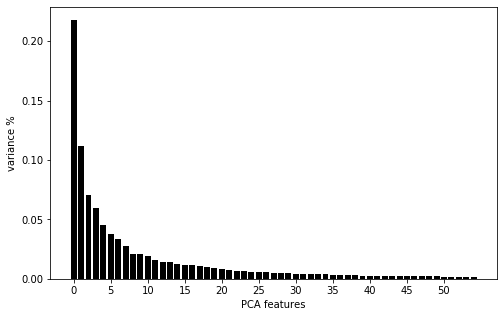

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=55)
principalComponents = pca.fit_transform(X["GM"])
print(pca.explained_variance_ratio_)

# Plot the explained variances
features = range(pca.n_components_)
explained_variance = pca.explained_variance_ratio_
plt.figure( figsize=(8,5) )
plt.bar(features, explained_variance, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(np.arange(0,55,step=5))

plt.show()

In [4]:
explained_variance = list(explained_variance)
list_of_sums = []
somma = 0
for exp_var in explained_variance :
    somma = somma + exp_var
    list_of_sums.append(somma)
print(list_of_sums)

list_of_sums_90_variance = []
for l_90 in list_of_sums :
    if l_90 <= 0.90 :
        list_of_sums_90_variance.append(l_90)
        n_comp_90 = len(list_of_sums_90_variance)
print("Il numero di componenti che spiegano il 90% della varianza è :",n_comp_90)

list_of_sums_80_variance = []
for l_80 in list_of_sums :
    if l_80 <= 0.80 :
        list_of_sums_80_variance.append(l_80)
        n_comp_80 = len(list_of_sums_80_variance)
print("Il numero di componenti che spiegano il 80% della varianza è :",n_comp_80)

list_of_sums_70_variance = []
for l_70 in list_of_sums :
    if l_70 <= 0.70 :
        list_of_sums_70_variance.append(l_70)
        n_comp_70 = len(list_of_sums_70_variance)
print("Il numero di componenti che spiegano il 70% della varianza è :",n_comp_70)

list_of_sums_60_variance = []
for l_60 in list_of_sums :
    if l_60 <= 0.60 :
        list_of_sums_60_variance.append(l_60)
        n_comp_60 = len(list_of_sums_60_variance)
print("Il numero di componenti che spiegano il 60% della varianza è :",n_comp_60)

list_of_sums_50_variance = []
for l_50 in list_of_sums :
    if l_50 <= 0.50 :
        list_of_sums_50_variance.append(l_50)
        n_comp_50 = len(list_of_sums_50_variance)
print("Il numero di componenti che spiegano il 50% della varianza è :",n_comp_50)
        
        

# Faremo 3 clusterizzazioni: una usando 2 componenti, una usando 3 componenti ed un'altra usando un numero di \
# componenti sufficiente a spiegare il 90% della varianza, per fare quest'ultimo passaggio ho usato il ciclo \
# sopra riportato .
    
    
    
    

[0.21791715023501473, 0.3299904465140734, 0.40016627467776805, 0.45964695092533064, 0.5052370327680356, 0.5430273430398884, 0.576384839198387, 0.6035926353478965, 0.6248739633513674, 0.646064383740223, 0.6652043654149289, 0.6811679507988689, 0.6956474920074915, 0.7096161247567383, 0.7224552640489972, 0.734215744256545, 0.7455891997704993, 0.7562900463426634, 0.7662908395836964, 0.7752484734072538, 0.7833931062621499, 0.7907478876032438, 0.7975966839473285, 0.8039928825091361, 0.8096809028103884, 0.8153180764402645, 0.8207654870016606, 0.8256163438172996, 0.8303339297384517, 0.8348164060752483, 0.8391980446096712, 0.8435185126288567, 0.8477323504214123, 0.8516827230778751, 0.8553061646820593, 0.8588648497504348, 0.8621753396023576, 0.8652464506277937, 0.8682011747144102, 0.8709699253094891, 0.8737067025079345, 0.8763432705160081, 0.8788984144084457, 0.8814059824273254, 0.8838009003509039, 0.886032770007406, 0.8881609814392453, 0.8902588921991437, 0.8922631737630132, 0.8942374018623281, 

In [5]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.385628,-3.797450,-0.205515,0.577468,2.650235,2.107584,-0.507962,-1.988272,-0.272682,1.292063,...,0.139231,0.235839,0.122493,-0.008927,-0.295653,-0.154062,0.779451,0.173885,0.019964,-0.287274
1,-1.852267,-0.967470,1.521799,-2.190522,1.602440,-1.351195,-0.842831,-2.400753,2.772700,-0.622955,...,0.158675,0.147250,-0.289230,-0.344803,0.560895,-0.087436,-0.212748,-0.538111,0.097532,-0.213406
2,-3.337043,-3.978068,0.821395,-1.131030,-0.451054,1.285466,1.379637,-0.724121,-0.555809,1.270822,...,-0.025655,0.159475,0.082810,0.182118,0.077073,0.162884,-0.094087,0.019165,-0.103927,-0.229317
3,-0.253895,-0.667602,0.210576,1.674015,2.559883,3.029479,0.154352,-1.241352,0.541401,0.903706,...,0.129304,0.124674,0.116783,0.311684,-0.459420,-0.204274,0.526224,-0.007625,0.247309,-0.366515
4,-1.922622,-4.428363,1.265089,0.316525,-0.389950,1.273411,2.171385,-1.398246,-0.092055,0.865351,...,-0.194224,-0.053414,0.047806,0.031367,0.014861,-0.158584,0.104701,0.161354,-0.398061,-0.023979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,-2.148289,-0.223120,-0.461049,-2.137237,-1.346175,0.538462,1.127670,1.086609,0.661684,0.514355,...,0.108631,-0.195459,-0.391440,0.099721,-0.345798,0.114797,-0.416900,0.924847,0.268483,0.244644
1074,1.624281,-3.297367,1.289536,-1.760202,2.810553,1.727617,-2.237323,-1.001370,-1.300991,-0.158205,...,0.208868,-0.337706,-0.156061,-0.566280,-0.020558,-0.032580,-0.208342,0.222150,-0.514580,0.098458
1075,-4.973996,-1.083797,-0.892020,0.877158,-0.985322,0.842784,-0.448580,0.093925,0.040904,-0.102417,...,0.034399,-0.104250,-0.001413,-0.030373,0.251305,-0.116159,-0.018775,0.174406,0.016373,-0.139306
1076,-3.509222,-1.279654,0.934532,0.395040,-1.104419,-0.579890,-0.543524,0.658254,-1.447212,-0.528566,...,-0.277603,0.357406,0.270836,0.049559,-0.362856,-0.085700,-0.503626,0.066662,0.443619,0.462202


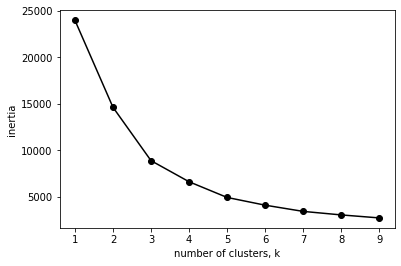

In [6]:
from sklearn.cluster import KMeans



ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

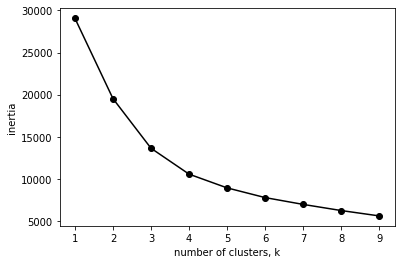

In [7]:
from sklearn.cluster import KMeans



ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

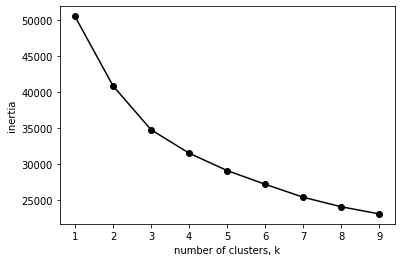

In [8]:
from sklearn.cluster import KMeans



ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:13])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

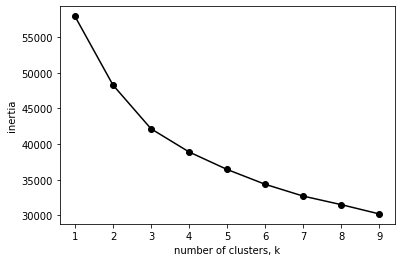

In [9]:
from sklearn.cluster import KMeans



ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:23])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

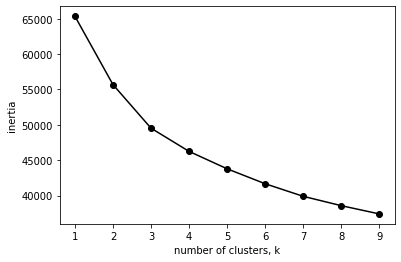

In [10]:
from sklearn.cluster import KMeans



ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:53])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

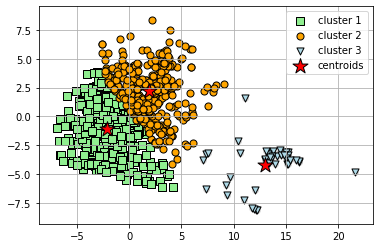

In [11]:
import numpy as np

# Using three clusters 
NC = 3

model = KMeans(n_clusters=NC)
   
X_01 = PCA_components.iloc[:,:2].values

y_km = model.fit(X_01)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')

clusters = {}
for idx , l in enumerate(y_km.labels_):
    if l in clusters:
        clusters[l].append(X_01[idx])
    else:
        clusters[l] = []
        clusters[l].append(X_01[idx])
        
        
c1 = np.asarray(clusters[0])
plt.scatter(
    c1[:,0],c1[:,1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

c2 = np.asarray(clusters[1])
plt.scatter(
    c2[:,0],c2[:,1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

c3 = np.asarray(clusters[2])
plt.scatter(
    c3[:,0],c3[:,1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [12]:
print(len(c1))
print(len(c2))
print(len(c3))

635
399
44


<IPython.core.display.Javascript object>


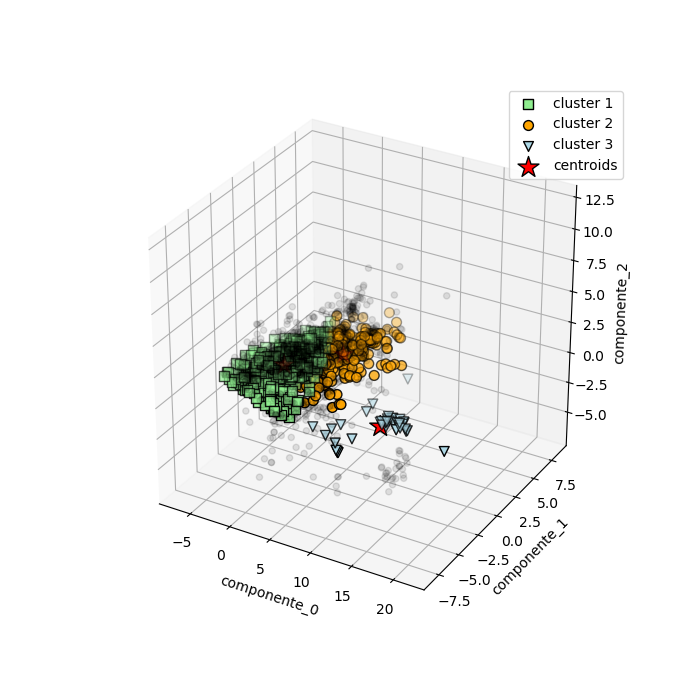

In [13]:
import numpy as np
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D


# Using three clusters 
NC = 3

model = KMeans(n_clusters=NC)
   
X_01 = PCA_components.iloc[:,:3].values

y_km = model.fit(X_01)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d' )

ax.scatter(PCA_components[0], PCA_components[1],PCA_components[2], alpha=.1, color='black')
ax.set_xlabel("componente_0")
ax.set_ylabel("componente_1")
ax.set_zlabel("componente_2")

clusters = {}
for idx , l in enumerate(y_km.labels_):
    if l in clusters:
        clusters[l].append(X_01[idx])
    else:
        clusters[l] = []
        clusters[l].append(X_01[idx])
        
        
c1 = np.asarray(clusters[0])
plt.scatter(
    c1[:,0],c1[:,1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

c2 = np.asarray(clusters[1])
plt.scatter(
    c2[:,0],c2[:,1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

c3 = np.asarray(clusters[2])
plt.scatter(
    c3[:,0],c3[:,1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()



In [14]:
print(len(c1))
print(len(c2))
print(len(c3))

698
339
41
